In [35]:
import torch
import torchvision
import torchvision.transforms as transforms

In [44]:
#load data
#this might take a while as it will download the dataset from internet
batch_size = 4
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
data_train = torchvision.datasets.MNIST('./', download=True, train=True, transform = transform)
trainloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
data_test = torchvision.datasets.MNIST('./', download=True, train=False, transform = transform)
testloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

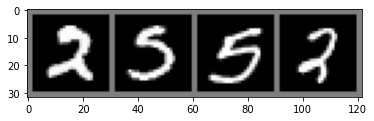

    2     5     5     2


In [45]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [61]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 10 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 10, 4)
        self.conv2 = nn.Conv2d(10, 20, 4)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(320, 100)  # 6*6 from image dimension
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [62]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [63]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.031
[1,  4000] loss: 0.224
[1,  6000] loss: 0.146
[1,  8000] loss: 0.123
[1, 10000] loss: 0.108
[1, 12000] loss: 0.092
[1, 14000] loss: 0.095
[2,  2000] loss: 0.069
[2,  4000] loss: 0.063
[2,  6000] loss: 0.065
[2,  8000] loss: 0.064
[2, 10000] loss: 0.064
[2, 12000] loss: 0.059
[2, 14000] loss: 0.052
Finished Training


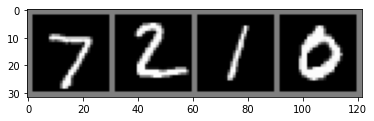

GroundTruth:      7     2     1     0
Predicted:      7     2     1     0


In [55]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [54]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 98 %
